In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%autosave 0

Autosave disabled


*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


# A primer in probability

Because of the inherent uncertainty and noise in observations of the real world, probability theory plays an important role in machine learning.  This notebook serves as a brief reminder of some of the important concepts.

Probability is a mathematical framework for expressing uncertainty about the outcome of events.  
We often encode this uncertainty in a variable, called a **random variable**.  A Random variable is a variable whose possible values are the possible outcomes of a random phenomenon.

**Example.**  the outcome of a coin toss or a roll of a die.

The possible outcomes of a random variable $X$, e.g. one that models a coin toss are represented with the notation:

$$
p(X = \mathrm{heads}) = 0.5
$$

**Definition.**
The probabilities of all possible values that a random variable can take are its **distribution**.  For a coin toss it is the numbers

$$
p(X = \mathrm{heads}) = 0.5,~ p(X = \mathrm{tails}) = 0.5
$$

As a shorthand, we often use the notation $p(\mathrm{heads})$ instead of $p(X = \mathrm{heads})$.

The sum of the probability of all events must equal 1. 
So if the probability of heads is 0.5, then the probability of tails (the only other possible outcome) is given by

$$
p(X = \mathrm{tails}) = 1 − p(X = \mathrm{heads}) = 0.5
$$

More generally, if a random variable takes on the values $x_i$, then we have that

$$
\sum_{i}^{}p(x_i)=1
$$

For example in our coin toss example:

In [1]:
# random variable that describes the outcome of a toin toss
p={'heads':0.5,'tails':0.5}

sum(p.values())

1.0

**Example.**  Rolling a die.  Each value has a probability of 1/6.

We can simulate a roll of a die using Numpy:

In [5]:
rng = np.random.default_rng()
rng.integers(1, 7)

2

By simulating the die many times we can estimate those probabilities.  We can observe that the estimates become better with increasing number of tries:

In [31]:
few_rolls  = rng.integers(1,7,size=100)
many_rolls = rng.integers(1,7,size=1000000)

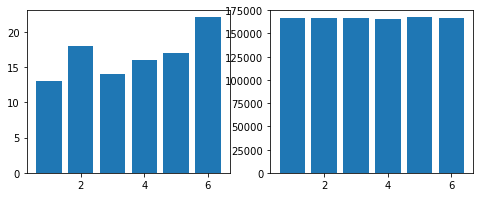

In [32]:
few_counts  = np.histogram(few_rolls,  bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))
ax1.bar(np.arange(1,7), few_counts)
ax2.bar(np.arange(1,7), many_counts);


### Joint probability distribution

The joint probability distribution for two variables $X,Y$ is a table whose entries are $p(x_i,y_j)$.

In the case of binary variables, the joint probability distribution is a $2\times2$ table.

**Example.**  Two coin tosses.
The joint probability distribution for two random variables can be represented as a table that lists the probabilities for each pair of events.  In our coin tosses examples we have following table:


| Toss              | Toss2 = heads | Toss2 = tails | 
| :-----------------|:-------------:| :------------:|
| **Toss1 = heads** |     0.25      |       0.25    |
| **Toss1 = tail**  |     0.25      |       0.25    |

This holds true, because all possible outcomes are equally likely.

### Marginal probability

We compute the marginal probability by summing over all variables we are not interested in:

$$ p(x)=\sum_{j}^{}p(x,y_j) $$

We can compute the marginal for our coin toss example:

| Toss              | Toss2 = heads    | Toss2 = tails | Marginal |
| :-------------|:-------------:| :----------:| :------------: |
| **Toss1 = heads** | 0.25 | 0.25 | 0.50 |
| **Toss1 = tail**  | 0.25      |   0.25 | 0.50 |
| **Marginal** |  0.50  | 0.50  |  1.0 | 

### Conditional probability

The conditional probability of $Y$ given $X$ is defined by:

$$p(y|x)=\frac{p(y,x)}{p(x)}$$


### The product rule

The product rule is a direct consequence of the definition of conditional probability:

$$ p(x,y)=p(y|x)p(x) $$

### Independence

Random variables $X$ and $Y$ are independent if $p(y|x) = p(y)$ for all values $x$ of $X$ and all values $y$ of $Y$.

Plugging this into the product rule, we obtain that two variables are independent if $p(x,y) = p(x) p(y)$.

**Example.**  Let's revisit our coin toss example, which is has the following table:

| Toss              | Toss2 = heads | Toss2 = tails | 
| :-----------------|:-------------:| :------------:|
| **Toss1 = heads** |     0.25      |       0.25    |
| **Toss1 = tail**  |     0.25      |       0.25    |

Since the coin tosses are independent, each element in the table is the product of the individual probabilities.

**Example**.  Consider the following game of dice:  Roll a die four times.  If a six comes up one or more times, I win.  What is the probability that I win?
This game is famously attributed to [Chevalier de Méré](https://en.wikipedia.org/wiki/Antoine_Gombaud), who from his experience, found this to be a lucrative game.  However, he did not know just how likely he is to win.  He asked the famous mathematician Blaise Pascal for help.

First let us simulate this game in Numpy (no for loops!)

In [12]:
num_games = 100000
rng = np.random.default_rng()
rolls = rng.integers(1, 7, size=(num_games, 4))
sixes_per_game = (rolls==6).sum(axis=1)
print('fraction of games won: ', np.sum(sixes_per_game >= 1)/num_games)

fraction of games won:  0.51976


We can compare this to the analytical solution to the problem:  the four rolls are independent, therefore the probability of not getting a six in all four rolls is $(5/6)^4$.  The event of interest, is its complement, with a probability of $1-(5/6)^4$.  Let's compare the resulting number with our simulation:

In [22]:
1-(5/6)**4

0.5177469135802468

**Example:** weather in two nearby cities (based on an example from [machinelearningmastery.com](https://machinelearningmastery.com/how-to-calculate-joint-marginal-and-conditional-probability/)).

As a more interesting example, let's consider weather in two cities that are a not so far from each other.  The weather (sunny/cloudy/rainy) in each city is not indepedent of the weather in the other.  Suppose the joint probability distribution is the following (constructed, say out of observations of the weather across 20 days):


| Weather       | w2=Sunny  | w2=Cloudy | w2=Rainy |
| :-------------|:---------:| :--------:| :-------:|
| **w1=Sunny**  |   6/20    |   2/20    |   0/20   |
| **w1=Cloudy** |   1/20    |   5/20    |   2/20   |
| **w1=Rainy**  |   0/20    |   1/20    |   3/20   |

We can add to this table the marginal probabilities:


| Weather       | w2=Sunny  | w2=Cloudy | w2=Rainy | Marginal    |
| :-------------|:---------:| :--------:| :-------:| :----------:|
| **w1=Sunny**  |   6/20    |   2/20    |   0/20   |  8/20       |
| **w1=Cloudy** |   1/20    |   5/20    |   2/20   |  8/20       |
| **w1=Rainy**  |   0/20    |   1/20    |   3/20   |  4/20       |
| **Marginal**  |   7/20    |   8/20    |   5/20   |  20/20      |


Now let's compute probability of it being sunny in city 2, given that it is sunny in city 1.

$$
p(\mathrm{w1}=\mathrm{sunny} | \mathrm{w2}=\mathrm{sunny}) = \frac{p(\mathrm{w1}=\mathrm{sunny}, \mathrm{w2}=\mathrm{sunny})}{p(\mathrm{w2}=\mathrm{sunny})} = \frac{6/20}{7/20} = 6/7
$$

Compare that to $p(\mathrm{w1}=\mathrm{sunny}) = 8/20$.  This illustrates that knowing that city 2 is sunny makes it much more likely that city 1 is also sunny.  These events are clearly not independent!



### Continuous probability distributions


Continuous random variables can take on any real number.  The canonical example is the Gaussian (aka normal) distribution.  The standard normal distribution (mean equal to zero and standard deviation equal to 1) has the following probability distribution:

$$f(x) = \frac{1}{\sqrt{2 \pi}}e^{-x^2/2}$$

Let's simulate that in Numpy:

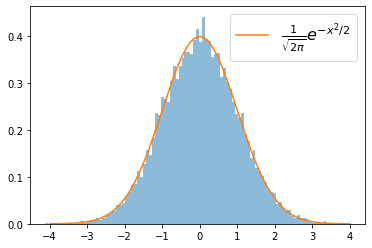

In [33]:
sample = rng.standard_normal(size=(10000,))
plt.hist(sample, 100, density=True, alpha=0.5);

x = np.linspace(-4, 4, 1000)
normal = (1/np.sqrt(2*np.pi))*np.exp(-x**2/2)
plt.plot(x,normal, label=r'$\frac{1}{\sqrt{2 \pi}}e^{-x^2/2}$');
plt.legend(fontsize='16');